# Hands-on Search Algorithms
## Artificial Intelligence Fundamentals 2023/24
Elia Piccoli (elia.piccoli@phd.unipi.it)

---

## Creating the virtual environment and installing required packages

Create the virtual environment and activate it.

You can use _venv_, _virtualenv_ or _conda_ whichever you prefer.

In [ ]:
python3 -m venv minihack
source minihack/bin/activate

Install _nle_ (https://github.com/facebookresearch/nle)

In [ ]:
pip install nle

Install _minihack_ (https://github.com/facebookresearch/minihack)

In [ ]:
pip install minihack

Install other packages needed for this hands-on (_matplotlib_ for plots, _notebook_ for jupyter notebooks)

In [ ]:
pip install matplotlib notebook

Activate the jupyter server and access it by the localhost at the given port (usually 8888 or around that number)

In [ ]:
jupyter notebook

---

## Creating minihack environments and their features

In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

Show list of all minihack environments

In [ ]:
!python -m minihack.scripts.env_list

Create and render the environment

In [2]:
# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       ..        .|                                                           
|.... ..... ........|                                                           
|.... .  ..       ..|                                                           
|@. .....>. ........|                                                           
|..     ... .     ..|                                                           
|.......... ... . ..|                                                           
|.      ...   . . ..|                                                           
|.............. ....|      

Using the env instance is possible to print the available actions

In [3]:
env.actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>,
 <Command.OPEN: 111>,
 <Command.KICK: 4>,
 <Command.SEARCH: 115>,
 <Command.EAT: 101>)

Analyzing the state variable we can see all the different representations

check: https://minihack.readthedocs.io/en/latest/getting-started/observation_spaces.html

In [ ]:
state

In our case we will consider only two representations:
- _chars_: represents the map using a multi-dimensional array containing the ASCII encoding of the characters
- _pixel_: stores the 3 channel informations to render visually the environment

In [4]:
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----.-    ---                                                           
|.       ....      .|                                                           
|.......... . ... ..|                                                           
|..     .>. . . . ..|                                                           
|@. ... ... ... . ..|                                                           
|..   . ...     . ..|                                                           
|.... . ... ... . ..|                                                           
|.. . . ... .   . ..|                                                           
|.... ..... ........|      

Print the shape of the two representations

In [ ]:
state['chars'].shape, state['pixel'].shape

In [ ]:
type(state['pixel'])

We can render visually the environment

In [ ]:
plt.imshow(state['pixel'])

In [ ]:
# add by me
plt.imshow(state['chars'])

---

In [5]:
from utils import *
from algorithms import bfs, a_star

## Breadth-First Search (BFS)

```
procedure BFS(G, start_vertex):
    create a queue Q
    create a set visited
    enqueue start_vertex into Q
    add start_vertex to visited
    
    while Q is not empty:
        current_vertex = dequeue from Q
        process current_vertex
        
        for each neighbor in G.adjacent(current_vertex):
            if neighbor is not in visited:
                enqueue neighbor into Q
                add neighbor to visited

Create the first environment

In [6]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           ..            .|                                                   
|...... ... ... ......... ..|                                                   
|..   . . . ..> .       . ..|                                                   
|.... ... ..... ....... . ..|                                                   
|.. .       ... .     . . ..|                                                   
|@. ... ... ... . ..... ....|                                                   
|.    . . .  .. . .       ..|                                                   
|.... ... ..... . ....... .

Render the environment (we reduce the representation to remove usesless black space)

In [ ]:
plt.imshow(state['pixel'][25:300, :475])

In [ ]:
# plt.imshow(state['chars'][:20,:30])
plt.imshow(state['chars']) # 21x79

Store the state ASCII representation, which will be used to compute the solution, and the pixel information

In [7]:
game_map = state['chars']
game = state['pixel']

In [ ]:
# add by me
game_map

In [ ]:
game_map.shape

In [ ]:
# add by me
game

In [ ]:
game_map[2,10]

In [ ]:
chr(game_map[0,0])

Find the player (@) and the target (>) using the functions in _utils.py_

In [8]:
# la prima coordinata è la y (dall'alto verso il basso) e parte da 1
# la seconda coordinata è la x (da sinistra verso destra) e parte da 1
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (9, 1)
Target position: (6, 14)


Compute the solution finding the path to reach the target

In [9]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 0 ns, sys: 1.72 ms, total: 1.72 ms
Wall time: 1.65 ms


The expected output is a list of tuples that contains the (x, y) coordinates that the player has to visit in order to reach the target.

In [ ]:
path

From the sequence of (x, y) coordinates compute the actual actions.

In [10]:
actions = actions_from_path(start, path[1:])

In [ ]:
actions

Iterate over actions and render the environment to see the solution.

RuntimeError: Called step on finished NetHack

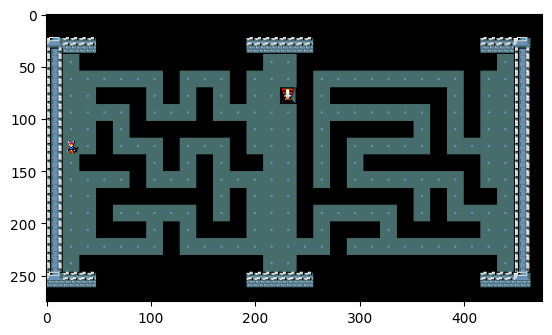

In [12]:
# env.step(action) fa muovere il personaggio.
# come parametro action è o un intero (0 -> up; 1 -> dx; 2 -> down; 3 -> sx) oppure una lista di interi
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

---

## Using custom des files
- https://minihack-editor.github.io/
- https://minihack.readthedocs.io/en/latest/tutorials/des_file_tutorial.html

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][75:300, 450:800])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = bfs(game_map, start, target)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
# add by me
actions

In [ ]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

---

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][:, 300:975])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = bfs(game_map, start, target)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

---

## A* Search Algorithm

A* (star) Pathfinding
```
// Initialize both open and closed list  
let the openList equal empty list of nodes  
let the closedList equal empty list of nodes
// Add the start node  
put the startNode on the openList
// Loop until you find the end  
while the openList is not empty
	// Get the current node  
    let the currentNode equal the node with the least f value  
    remove the currentNode from the openList  
    add the currentNode to the closedList
    // Check if found the goal  
    if currentNode is the goal  
        Congratz! You've found the end! Backtrack to get path
	
	// Generate children  
    let the children of the currentNode equal the adjacent nodes  
      
    for each child in the children 
	    // Check if child is on the closedList  
        if child is in the closedList  
            continue to beginning of for loop
        
        // Create the f, g, and h values  
        child.g = currentNode.g + distance between child and current  
        child.h = distance from child to end  
        child.f = child.g + child.h
        
        // Child is already in openList  
        if child.position is in the openList's nodes positions  
            if the child.g is higher than the openList node's g  
                continue to beginning of for loop
        
        // Add the child to the openList  
        add the child to the openList

In [ ]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][25:300, :475])

In [ ]:
game_map = state['chars']
game = state['pixel']

In [ ]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

---

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][75:300, 450:800])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

---

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][:, 300:975])

In [ ]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

---

Using the '_crop_' combined with some observation keys, it returns a view centered around the agent.
Usually is 9x9, but can be modified at preference.

In [ ]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel_crop"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel_crop'])

In [ ]:
game_map = state['chars']
game = state['pixel_crop']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [ ]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

In [ ]:
actions = actions_from_path(start, path[1:])

In [ ]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])